In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.core.dtypes.missing import isna
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Loaner Data Set 

In the **'loan.csv'** file, we can find the loans issues througth the time period from 2007 to 2011 and i am going to use the dataset to identify the risk in lending 

### Critical case study 

If the applicant is **likely to repay the loan**, then not approving the loan results in a **loss of business** to the company


If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a **financial loss** for the company

In [3]:
loandataset = pd.read_csv('/content/drive/MyDrive/Upgrad/Data Analysis/CaseStudy/loan.csv')

loandataset.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loandataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loandataset.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

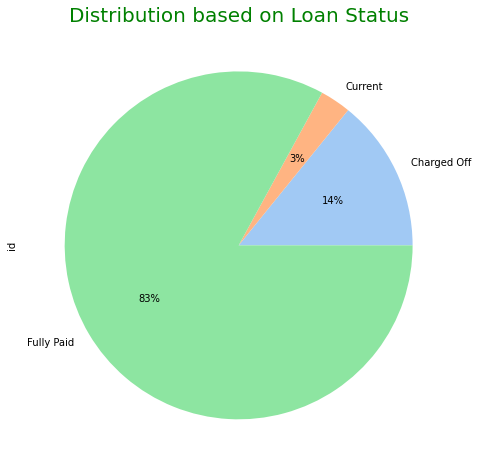

In [6]:
plt.figure(figsize = [8,8])
colors = sns.color_palette('pastel')
loandataset.groupby(["loan_status"])["id"].count().plot.pie(colors = colors, autopct='%.0f%%') 

# Adding and formatting title
plt.title("Distribution based on Loan Status", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})

plt.show()

In [ ]:
loandataset['term'].unique()


array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
pd.pivot_table(loandataset, index=['term', 'loan_status'], values='id', aggfunc='count').head(10)

id
term       loan_status       
 36 months Charged Off   3227
           Fully Paid   25869
 60 months Charged Off   2400
           Current       1140
           Fully Paid    7081

**Getting Initial Loan Analysis  Data for verification ➰**

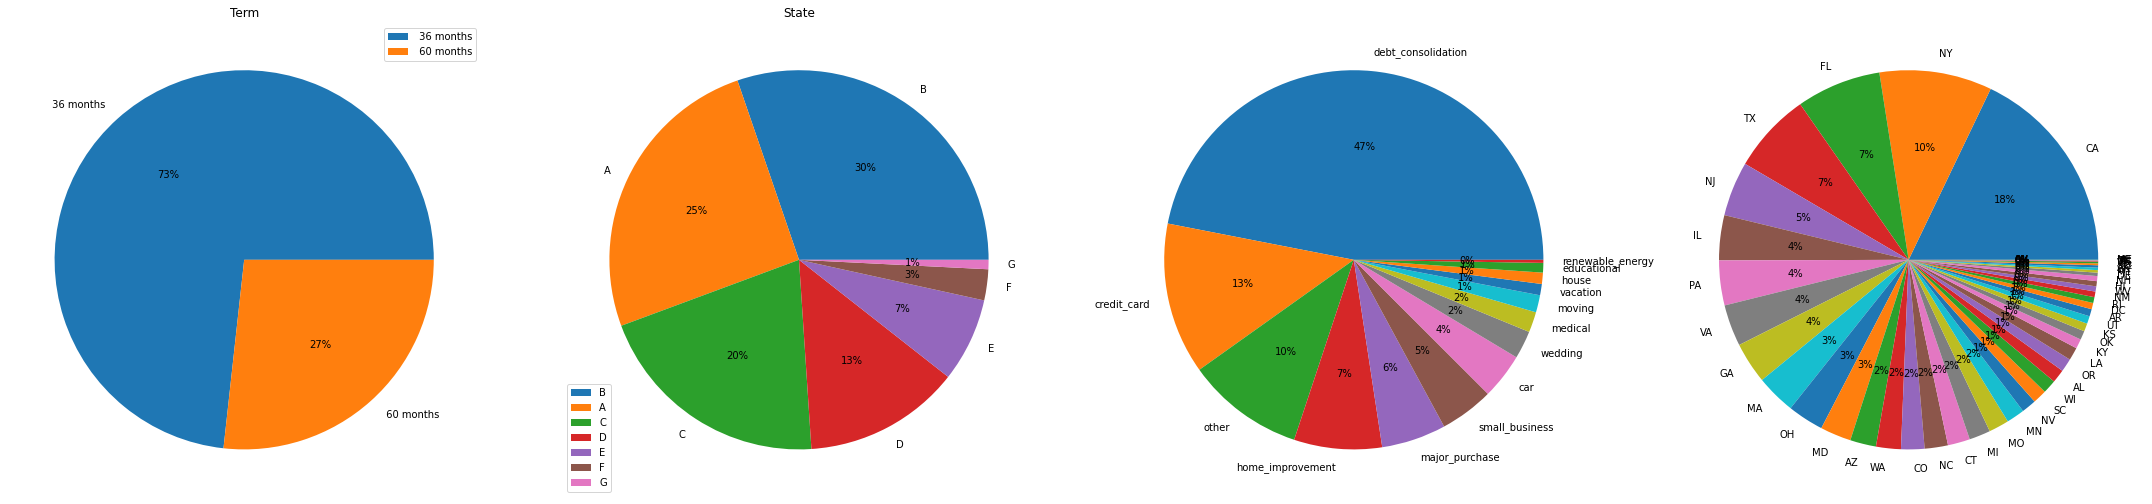

In [11]:
term_data_1 =  loandataset['term'].value_counts().reset_index()
grade_data_1 =  loandataset['grade'].value_counts().reset_index()
purpose_data_1 = loandataset['purpose'].value_counts().reset_index()
state_data_1 = loandataset['addr_state'].value_counts().reset_index()

fig , (ax1,ax2,ax3,ax4) = plt.subplots(nrows = 1, ncols=4,figsize=(30,30))

#fig = plt.figure(figsize=(20,20))
ax1.pie(term_data_1['term'], labels=term_data_1['index'],  autopct='%.0f%%')
ax1.legend()
ax1.set_title("Term")

ax2.pie(grade_data_1['grade'], labels=grade_data_1['index'],  autopct='%.0f%%')
ax2.legend()
ax2.set_title("Grade")

ax3.pie(purpose_data_1['purpose'], labels=purpose_data_1['index'],  autopct='%.0f%%')
#ax3.legend()
ax2.set_title("Purpose")

ax4.pie(state_data_1['addr_state'], labels=state_data_1['index'],  autopct='%.0f%%')
#ax4.legend()
ax2.set_title("State")

plt.tight_layout()
plt.show()


In [8]:
ChargedOff_loandataset =  loandataset[loandataset["loan_status"] == "Charged Off"]

ChargedOff_loandataset 

#ChargedOff_loandataset.plot.pie()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
14,1069057,1303503,10000,10000,10000.0,36 months,10.65%,325.74,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,118823,118026,2500,2500,675.0,36 months,12.80%,84.00,D,D4,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
39668,118533,117783,2500,2500,825.0,36 months,9.64%,80.26,B,B4,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
39669,118523,118519,6500,6500,225.0,36 months,15.01%,225.37,F,F1,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
39678,113179,113093,1000,1000,950.0,36 months,10.59%,32.55,C,C2,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


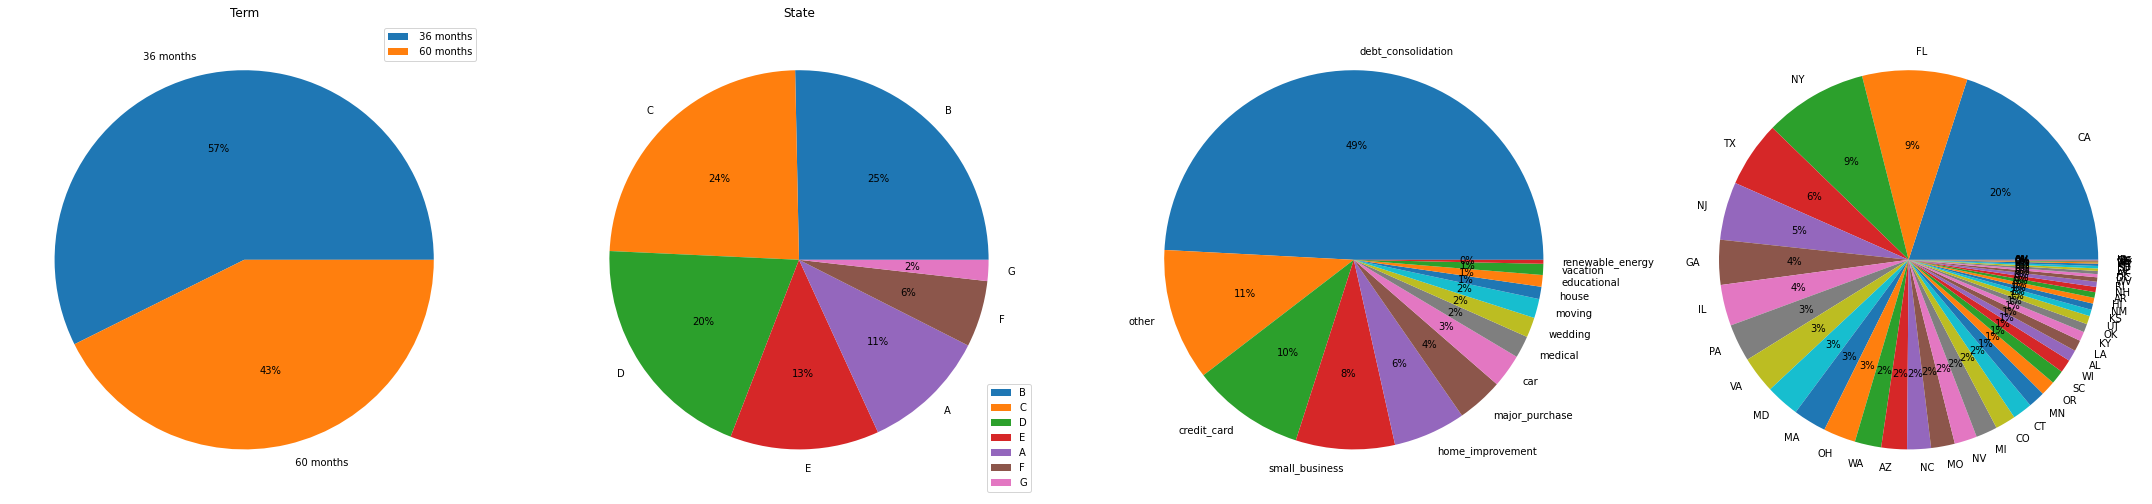

In [12]:

term_data = ChargedOff_loandataset['term'].value_counts().reset_index()
grade_data = ChargedOff_loandataset['grade'].value_counts().reset_index()
purpose_data =ChargedOff_loandataset['purpose'].value_counts().reset_index()
state_data =ChargedOff_loandataset['addr_state'].value_counts().reset_index()

fig , (ax1,ax2,ax3,ax4) = plt.subplots(nrows = 1, ncols=4,figsize=(30,30))

#fig = plt.figure(figsize=(20,20))
ax1.pie(term_data['term'], labels=term_data['index'],  autopct='%.0f%%')
ax1.legend()
ax1.set_title("Term")

ax2.pie(grade_data['grade'], labels=grade_data['index'],  autopct='%.0f%%')
ax2.legend()
ax2.set_title("Grade")

ax3.pie(purpose_data['purpose'], labels=purpose_data['index'],  autopct='%.0f%%')
#ax3.legend()
ax2.set_title("Purpose")

ax4.pie(state_data['addr_state'], labels=state_data['index'],  autopct='%.0f%%')
#ax4.legend()
ax2.set_title("State")

plt.tight_layout()
plt.show()  



In [14]:
loandataset.shape

(39717, 111)

In [15]:
loandataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
